In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
sns.set(style="whitegrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/frdwish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Adjust filename if needed,
df = pd.read_csv("customer_support_tickets.csv", encoding="ISO-8859-1", engine="python", on_bad_lines="skip")

# Strip column names
df.columns = df.columns.str.strip()

# Check columns
print("Columns in CSV:", df.columns.tolist())

# Quick preview
df.head()

Columns in CSV: ['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating']


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [3]:
#checking the null values
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [4]:
#getting the clean overview 
print("Shape:", df.shape)
df.info()
df.head()
df.describe(include="all")

Shape: (8469, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null 

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
count,8469.000000,8469,8469,8469.000000,8469,8469,8469,8469,8469,8469,8469,2769,8469,8469,5650,2769,2769.000000
unique,NaN,8028,8320,NaN,3,42,730,5,16,8077,3,2769,4,4,5470,2728,NaN
top,NaN,Michael Garcia,bsmith@example.com,NaN,Male,Canon EOS,2020-10-21,Refund request,Refund request,I'm having an issue with the {product_purchase...,Pending Customer Response,Case maybe show recently my computer follow.,Medium,Email,2023-06-01 15:21:42,2023-06-01 17:14:42,NaN
freq,NaN,5,4,NaN,2896,240,24,1752,576,25,2881,1,2192,2143,3,3,NaN
mean,4235.000000,NaN,NaN,44.026804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.991333
std,2444.934048,NaN,NaN,15.296112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.407016
min,1.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2118.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,4235.000000,NaN,NaN,44.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
75%,6352.000000,NaN,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000


### Visualization

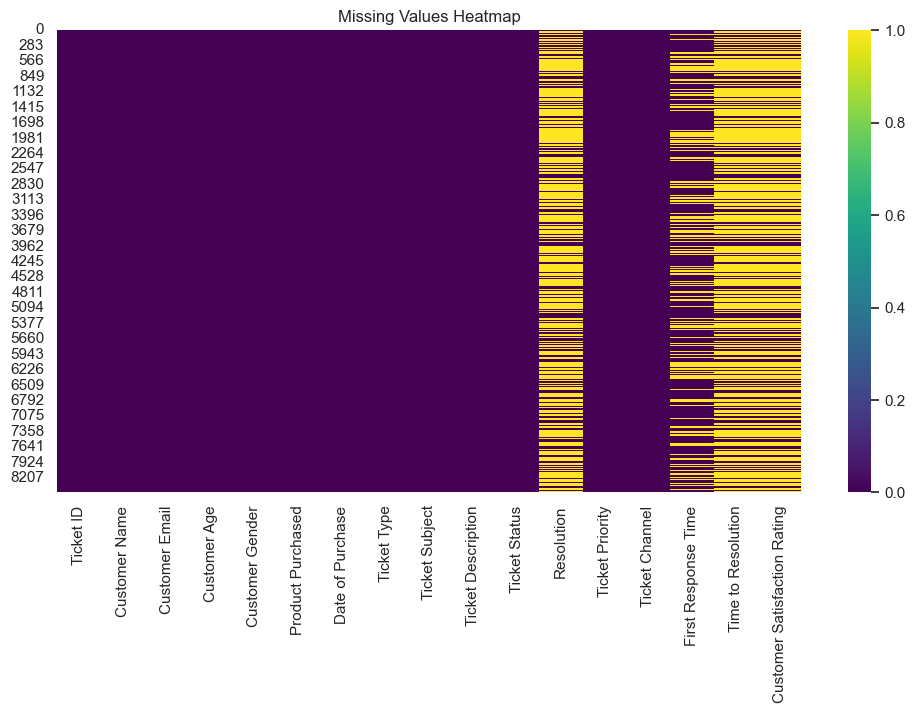

In [ ]:
#Missing Values Heatmap 
#visually identify which columns have missing data and how much.
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=True, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

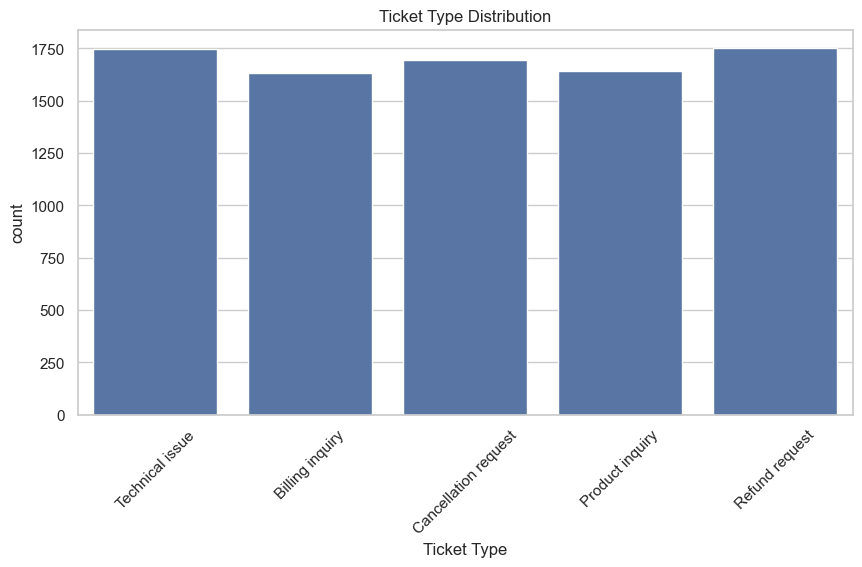

In [ ]:
#Ticket Type Distribution
#checking how ticket types are distributed and detect class imbalance.
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Ticket Type")
plt.title("Ticket Type Distribution")
plt.xticks(rotation=45)
plt.show()

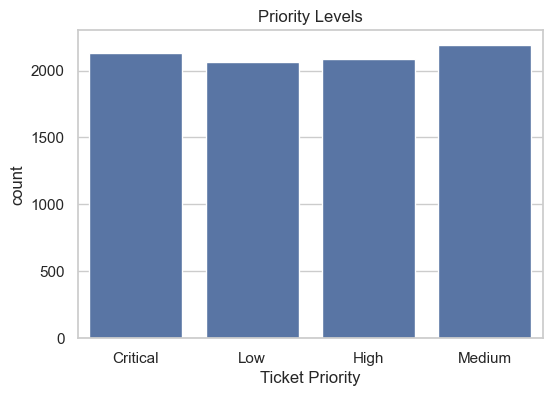

In [ ]:
#Priority Levels Distribution
#understand how ticket priorities are distributed in the dataset.
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Ticket Priority")
plt.title("Priority Levels")
plt.show()

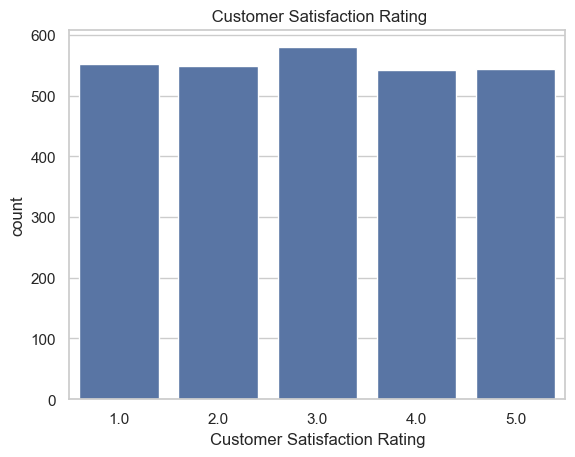

In [ ]:
#Customer Satisfaction Rating Distribution
#how well the customer is satisfy with products
sns.countplot(data=df, x="Customer Satisfaction Rating")
plt.title(" Customer Satisfaction Rating")
plt.show()

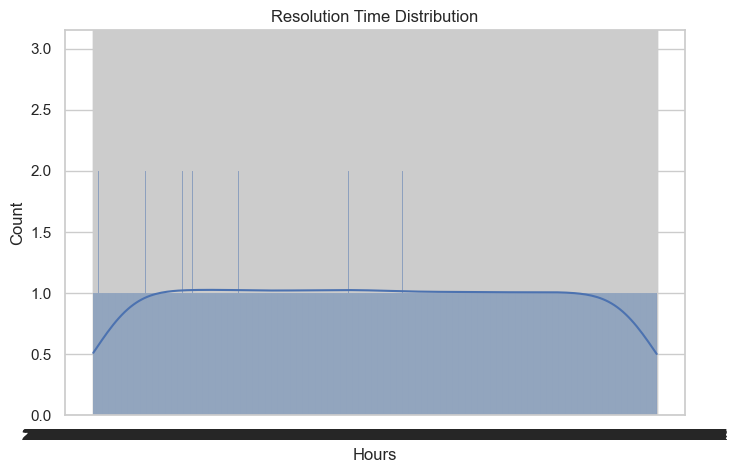

In [ ]:
#Resolution Time Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Time to Resolution"], kde=True)
plt.title("Resolution Time Distribution")
plt.xlabel("Hours")
plt.show()

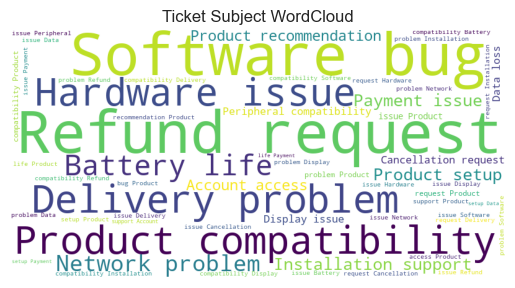

In [ ]:
#icket Subject WordCloud
text = " ".join(df["Ticket Subject"].astype(str))
wc = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.imshow(wc)
plt.axis("off")
plt.title("Ticket Subject WordCloud")
plt.show()

### Data Preprocessing

In [ ]:
# Keep only the useful columns needed for model training.
df = df[[
    "Ticket Subject",
    "Ticket Description",
    "Ticket Type",
    "Product Purchased"
]]

In [ ]:
# Convert text to lowercase and remove extra spaces for consistency.
df["Ticket Subject"] = df["Ticket Subject"].astype(str).str.strip().str.lower()
df["Ticket Description"] = df["Ticket Description"].astype(str).str.strip().str.lower()
df["Ticket Type"] = df["Ticket Type"].astype(str).str.strip().str.lower()
df["Product Purchased"] = df["Product Purchased"].astype(str).str.strip().str.lower()

In [ ]:
# Normalize messy or inconsistent ticket type labels into clean categories.
def normalize_label(x):
    x = x.lower()

    if "refund" in x or "billing" in x or "payment" in x:
        return "billing inquiry"

    if "tech" in x or "bug" in x or "error" in x or "not turning on" in x or "network" in x:
        return "technical issue"

    if "product" in x or "setup" in x or "compatibility" in x:
        return "product inquiry"

    return "other"
# Apply the label-normalization function to the Ticket Type column.
df["Ticket Type"] = df["Ticket Type"].apply(normalize_label)

In [ ]:
# Remove 'other' class because it is noisy and doesn't help model training.
df = df[df["Ticket Type"] != "other"]

In [ ]:
# Correct mislabeled tickets using keywords from the description.
df.loc[
    df["Ticket Subject"].str.contains("bill|refund|payment", na=False),
    "Ticket Type"
] = "billing inquiry"

In [ ]:
# Correct mislabeled tickets using keywords from the description.
df.loc[
    df["Ticket Description"].str.contains("error|not turning on|bug|crash|failed|issue", na=False),
    "Ticket Type"
] = "technical issue"

In [ ]:
# Remove entries with extremely short descriptions (low information).
df = df[df["Ticket Description"].str.len() > 5]

In [14]:
#droping duplicates
df = df.drop_duplicates()

In [12]:
# Ensure the 'data' directory exists before saving the cleaned file.
import os
os.makedirs("data", exist_ok=True)

In [13]:
# Save the cleaned dataset to disk for training the model.
df.to_csv("data/cleaned_tickets.csv", index=False)
print("Cleaned dataset saved!")

Cleaned dataset saved!


### Checking the Cleaned Dataset overview

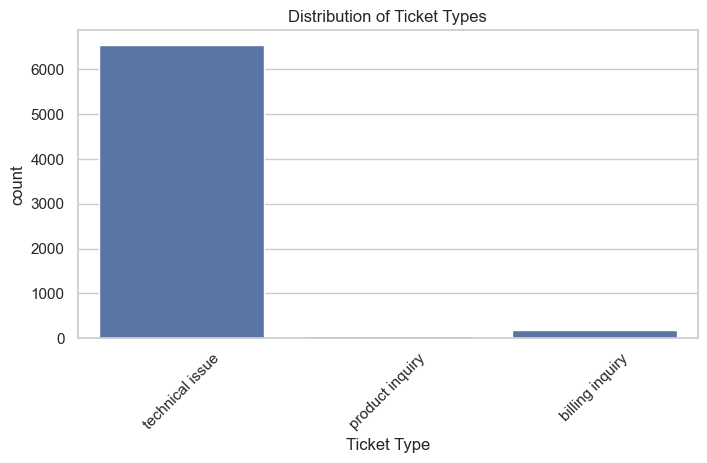

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ticket type distribution
plt.figure(figsize=(8,4))
sns.countplot(x=df["Ticket Type"])
plt.title("Distribution of Ticket Types")
plt.xticks(rotation=45)
plt.show()

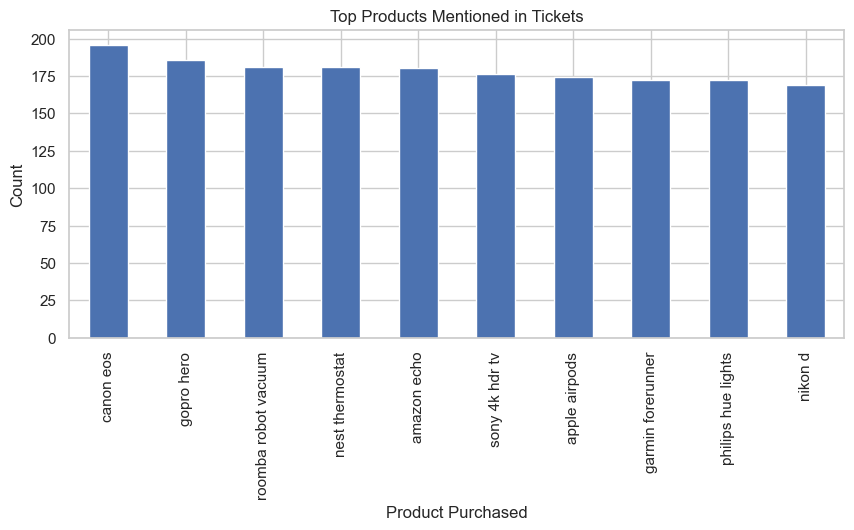

In [ ]:
#Most Common Products Purchased
plt.figure(figsize=(10,4))
df["Product Purchased"].value_counts().head(10).plot(kind="bar")
plt.title("Top Products Mentioned in Tickets")
plt.ylabel("Count")
plt.show()

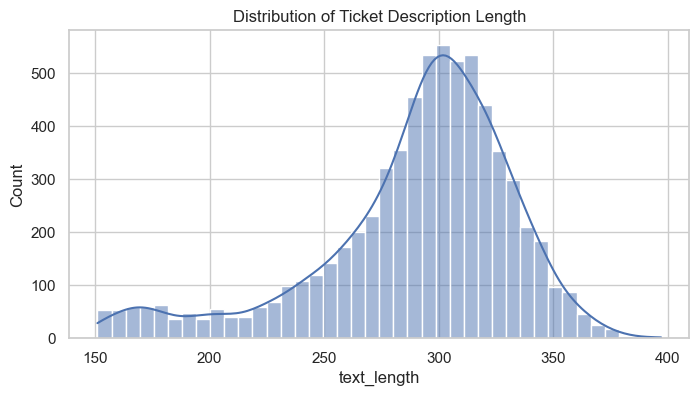

In [ ]:
#Text Length Distribution
df["text_length"] = df["Ticket Description"].apply(lambda x: len(str(x)))
plt.figure(figsize=(8,4))
sns.histplot(df["text_length"], bins=40, kde=True)
plt.title("Distribution of Ticket Description Length")
plt.show()

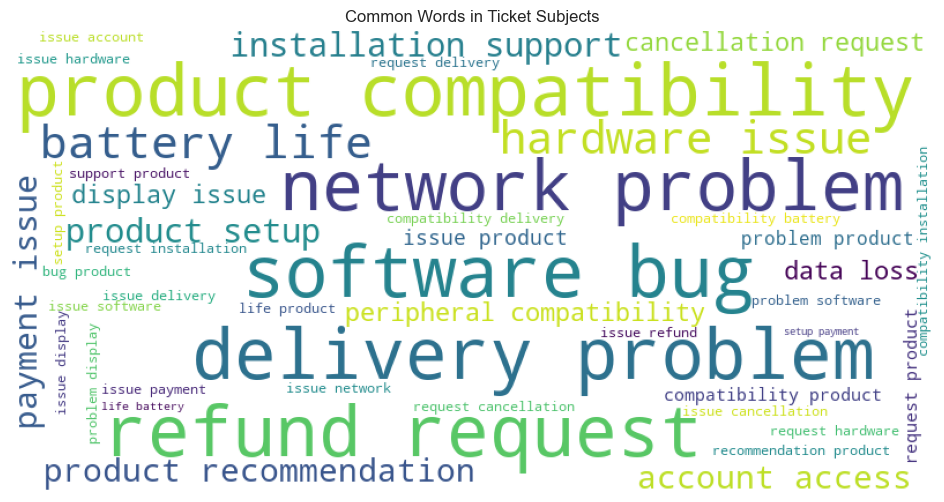

In [ ]:
#WordCloud for Ticket Subjects
from wordcloud import WordCloud

text = " ".join(df["Ticket Subject"].astype(str))
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.title("Common Words in Ticket Subjects")
plt.show()

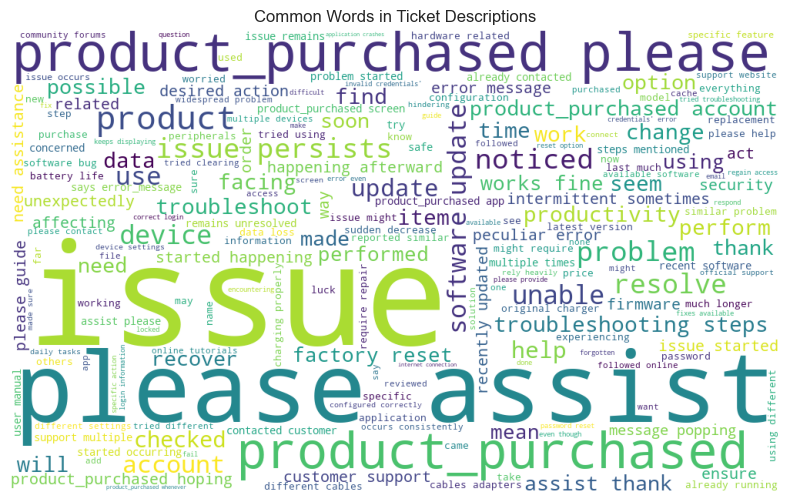

In [ ]:
#WordCloud for Ticket Descriptions
text = " ".join(df["Ticket Description"].astype(str))
wc = WordCloud(width=1000, height=600, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.title("Common Words in Ticket Descriptions")
plt.show()


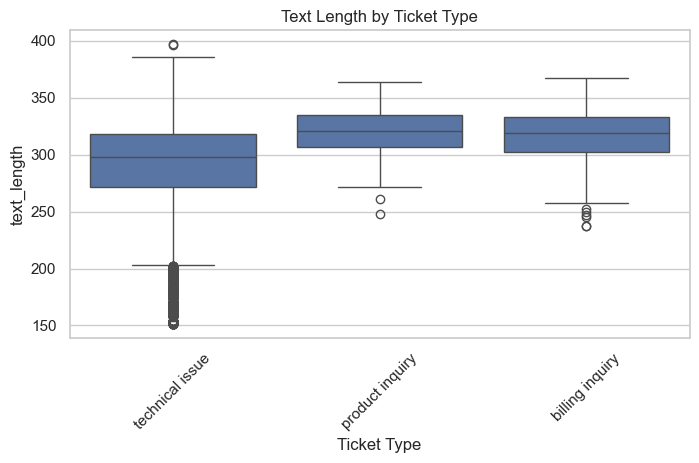

In [ ]:
#Ticket Type vs Text Length
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Ticket Type"], y=df["text_length"])
plt.xticks(rotation=45)
plt.title("Text Length by Ticket Type")
plt.show()